# Load simulated data

In [34]:
import numpy as np
import torch

from teddy.data.Alphabet import Alphabet
from teddy.data.dataset import *

alphabet = Alphabet(["A", "C", "G", "T"])
sims = MsaLabels("data/seq", alphabet)

theta, x = [], []

theta_0 = torch.Tensor(sims[0][1])
x_0 = torch.flatten(torch.Tensor(sims[0][0][0]))

for k_sim, sim in enumerate(sims):
    if k_sim == 0:
        continue
    theta.append(sim[1])
    x.append(sim[0][0])

theta = torch.Tensor(np.array(theta))
x = torch.flatten(torch.Tensor(np.array(x)), start_dim=1)

print(theta.shape, x.shape, x_0.shape)


torch.Size([99, 2]) torch.Size([99, 20402]) torch.Size([20402])


# NPE training

In [41]:
from sbi.inference import NPE

npe = NPE()
npe.append_simulations(theta, x)
npe.train()

 Neural network successfully converged after 51 epochs.

NFlowsFlow(
  (net): Flow(
    (_transform): CompositeTransform(
      (_transforms): ModuleList(
        (0): PointwiseAffineTransform()
        (1): MaskedAffineAutoregressiveTransform(
          (autoregressive_net): MADE(
            (initial_layer): MaskedLinear(in_features=2, out_features=50, bias=True)
            (context_layer): Linear(in_features=20402, out_features=50, bias=True)
            (blocks): ModuleList(
              (0-1): 2 x MaskedFeedforwardBlock(
                (linear): MaskedLinear(in_features=50, out_features=50, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (final_layer): MaskedLinear(in_features=50, out_features=4, bias=True)
          )
        )
        (2): RandomPermutation()
        (3): MaskedAffineAutoregressiveTransform(
          (autoregressive_net): MADE(
            (initial_layer): MaskedLinear(in_features=2, out_features=50, bias=True)
            (context_layer): Linear(in_fea

In [ ]:
from sbi.inference import NLE

nle = NLE()
nle.append_simulations(theta, x)
nle.train()

In [36]:
posterior = npe.build_posterior()
samples = posterior.sample((1_000,), x=x_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/tj/j43hbx0j0jvcmz6tvdtf2v0c0000gn/T/ipykernel_30829/2705479587.py:6: DeprecationWarning: you passed deprecated arguments **kwargs: ['points_colors'], use fig_kwargs instead. We continue calling the deprecated pairplot function
  fig, axes = pairplot(


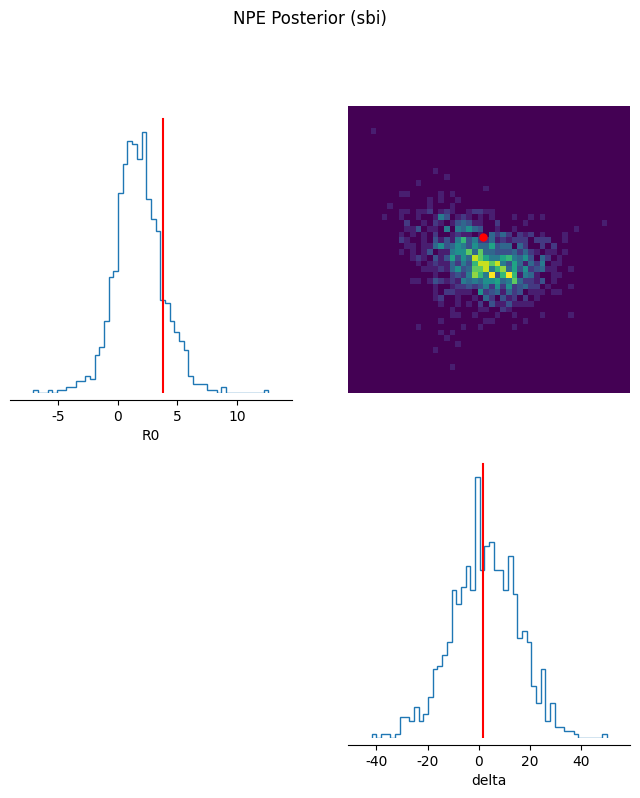

In [37]:
import matplotlib.pyplot as plt
from sbi.analysis import pairplot

param_labels = ["R0", "delta"]

fig, axes = pairplot(
    samples,
    labels=param_labels,
    figsize=(8, 8),
    points=theta_0,  # True parameters
    points_colors="r",
)
plt.suptitle("NPE Posterior (sbi)", y=1.02)
plt.show()